In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

In [9]:
df = pd.read_csv('churn.csv')

In [10]:
#VIEWING DATSET
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
df.shape

(7043, 21)

In [12]:
#Checking for null values.
null_df = df.isnull()
print(null_df)

      customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0          False   False          False    False       False   False   
1          False   False          False    False       False   False   
2          False   False          False    False       False   False   
3          False   False          False    False       False   False   
4          False   False          False    False       False   False   
...          ...     ...            ...      ...         ...     ...   
7038       False   False          False    False       False   False   
7039       False   False          False    False       False   False   
7040       False   False          False    False       False   False   
7041       False   False          False    False       False   False   
7042       False   False          False    False       False   False   

      PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0            False          False            False          

In [13]:
null_df.apply(lambda x: x.unique())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [14]:
#There are no null values in the dataframe

In [15]:
#Seeing the statistical measures of data
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [16]:
#DATA PREPARATION/MUNGING

#dropping customerID column as it doesnot affect churn
df.drop('customerID',axis='columns',inplace=True)

In [17]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [18]:
#Maintaining data integration
#The 'TotalCharges' is a object class whereas MonthlyCharges in float which seems to be a redundancy
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      shape=(7043,), dtype=object)

In [19]:
#The values are enclosed in quotation marks hence are strings
#So converting to numeric value
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [20]:
#While converting to numeric values errors arise for empty strings(" ")
#So using errors='coerce' to convert invalid values to specified alternative
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [21]:
#The TotalCharges with empty spaces are removed.
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()].shape

(11, 20)

In [22]:
#only 11 entries are empty so we can drop these empty rows.
df = df[df.TotalCharges!=' ']

In [23]:
df.TotalCharges = pd.to_numeric(df.TotalCharges)

In [24]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [25]:
#Exploratory data analysis
#Understanding the distribution on numeric features
def plot_histogram(df, column_name):

  plt.figure(figsize=(5, 3))
  sns.histplot(df[column_name], kde=True)
  plt.title(f"Distribution of {column_name}")

  # calculate the mean and median values for the columns
  col_mean = df[column_name].mean()
  col_median = df[column_name].median()

  # add vertical lines for mean and median
  plt.axvline(col_mean, color="red", linestyle="--", label="Mean")
  plt.axvline(col_median, color="green", linestyle="-", label="Median")

  plt.legend()

  plt.show()


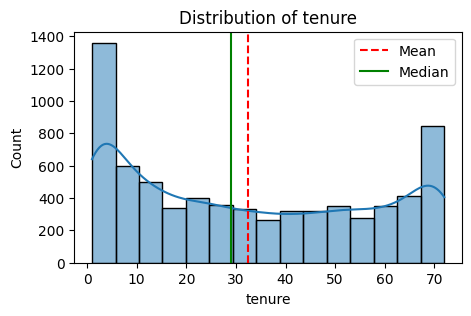

In [26]:
plot_histogram(df, "tenure")

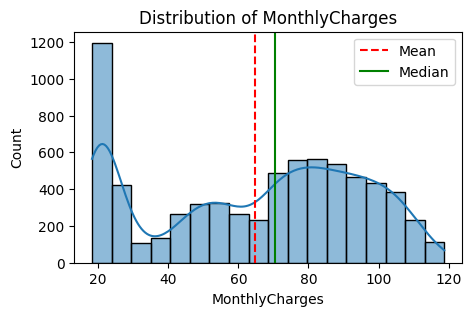

In [27]:
plot_histogram(df, "MonthlyCharges")

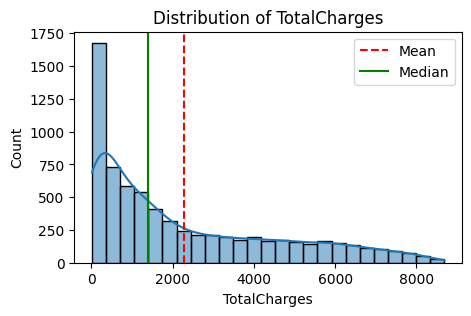

In [28]:
plot_histogram(df, "TotalCharges")

In [29]:
#BOX PLOT FOR NUMERIC FEATURES
def plot_boxplot(df, column_name):

  plt.figure(figsize=(5, 3))
  sns.boxplot(y=df[column_name])
  plt.title(f"Box Plot of {column_name}")
  plt.ylabel(column_name)
  plt.show

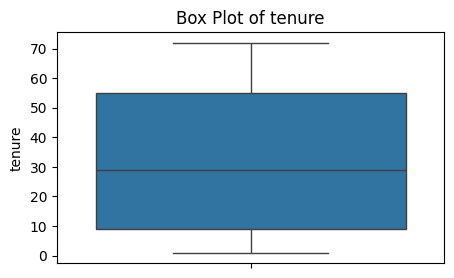

In [30]:
plot_boxplot(df, "tenure")

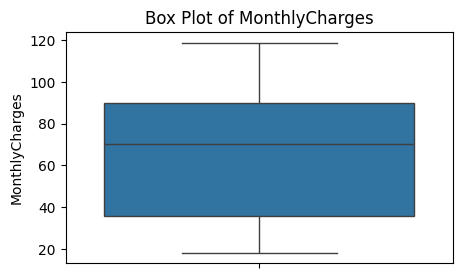

In [31]:
plot_boxplot(df, "MonthlyCharges")

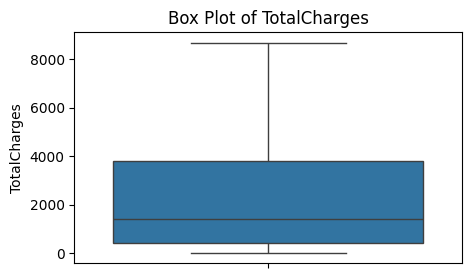

In [32]:
plot_boxplot(df, "TotalCharges")

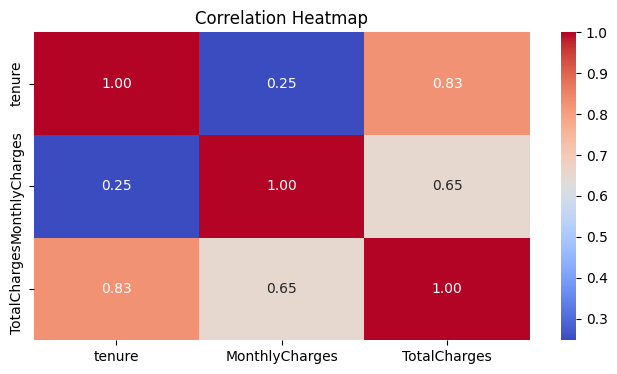

In [33]:
#correlation heatmap for numerical columns
# correlation matrix - heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(df[["tenure", "MonthlyCharges", "TotalCharges"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [34]:
#LABELING CATEGORICAL DATA
#Making a fxn for printing columns with 'object' data types and all the unique values it contains
def unique_col(df):
    for columns in df:
        if df[columns].dtypes=='object':
            print(f'{columns} : {df[columns].unique()}')

In [35]:
unique_col(df)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [36]:
#label encoding of target column
df["Churn"] = df["Churn"].replace({"Yes": 1, "No": 0})

/tmp/ipykernel_18662/3889943435.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Churn"] = df["Churn"].replace({"Yes": 1, "No": 0})


In [37]:
# identifying columns with object data type
object_columns = df.select_dtypes(include="object").columns
print(object_columns)

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


In [43]:
#The tenure, MonthlyCharges and TotalCharges column has higher values than the other features
#They can dominate during model training so they need to be scaled and normalized
cols_to_scale=['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df[cols_to_scale]=scaler.fit_transform(df[cols_to_scale])

In [44]:
#save the scaler as pickle file
with open('scaler.pickle', 'wb') as file:
    pickle.dump(scaler, file)

In [45]:
# initialize a dictionary to save the encoders
encoders = {}

# apply label encoding and store the encoders
for column in object_columns:
  label_encoder = LabelEncoder()
  df[column] = label_encoder.fit_transform(df[column])
  encoders[column] = label_encoder


# save the encoders to a pickle file
with open("encoders.pkl", "wb") as f:
  pickle.dump(encoders, f)

In [46]:
encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [47]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0.000000,0,1,0,0,2,0,0,0,0,0,1,2,0.115423,0.001275,0
1,1,0,0,0,0.464789,1,0,0,2,0,2,0,0,0,1,0,3,0.385075,0.215867,0
2,1,0,0,0,0.014085,1,0,0,2,2,0,0,0,0,0,1,3,0.354229,0.010310,1
3,1,0,0,0,0.619718,0,1,0,2,0,2,2,0,0,1,0,0,0.239303,0.210241,0
4,0,0,0,0,0.014085,1,0,1,0,0,0,0,0,0,0,1,2,0.521891,0.015330,1


In [42]:
#**Traianing and test data split**
X = df.drop(columns=["Churn"])#Features(all columns except 'Churn')
y = df["Churn"]#target variable

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.base import BaseEstimator
from sklearn.model_selection import KFold, cross_val_score

kf = KFold(n_splits=10, shuffle=True, random_state=42)
kf
# Define the models and their hyperparameters for grid search
models = {
    'MLP Classifier': (MLPClassifier(max_iter=5000), {
        'hidden_layer_sizes': [(50,), (100,), (50, 50)],
        'activation': ['tanh', 'relu'],
        'solver': ['adam', 'sgd'],
        'learning_rate': ['constant', 'adaptive']
    }),
    'Random Forest': (RandomForestClassifier(), {
        'n_estimators': [50, 100,200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    }),
    'SVM': (SVC(), {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf', 'poly'],  # Added 'poly' for polynomial kernel
        'degree': [2, 3, 4]  # Degree of the polynomial kernel
    }),
    'Logistic Regression': (LogisticRegression(max_iter=2000), {
        'C': [0.1, 1, 10],
        'solver': ['liblinear', 'saga','lbfgs']
    })
}

# Initialize a dictionary to store the best models and their scores
best_models = {}
best_scores = {}

# Perform grid search for each model
for model_name, (model, params) in models.items():
    grid_search = GridSearchCV(model, params, cv=kf, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X, y)
    
    # Store the best model and its score
    best_models[model_name] = grid_search.best_estimator_
    best_scores[model_name] = grid_search.best_score_
    
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best cross-validated accuracy for {model_name}: {grid_search.best_score_}")

# # Now you can use best_models to make predictions or further evaluations

KFold(n_splits=10, random_state=42, shuffle=True)

In [37]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, solver='lbfgs',C=0.1),  # Increase max_iter and set solver
    # "SVM (Polynomial Kernel)": SVC(kernel='linear',C=10),  # SVM with polynomial kernel
    "Random Forest": RandomForestClassifier(n_estimators=50,max_depth=10,min_samples_split=10),
    "ANN (MLP)": MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, solver='sgd', learning_rate='constant',random_state=42,activation='relu')  # ANN (MLP)
}

/home/soumya/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/soumya/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

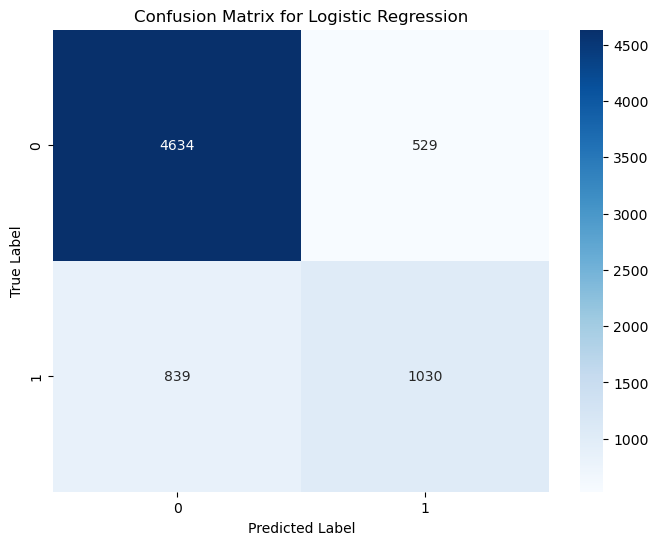

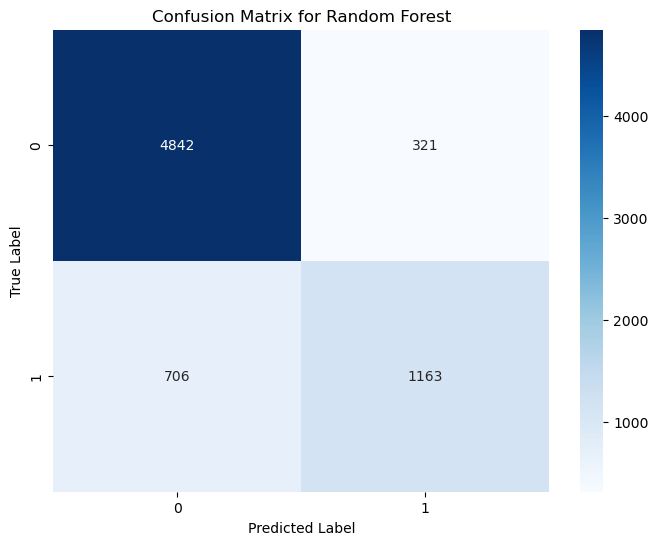

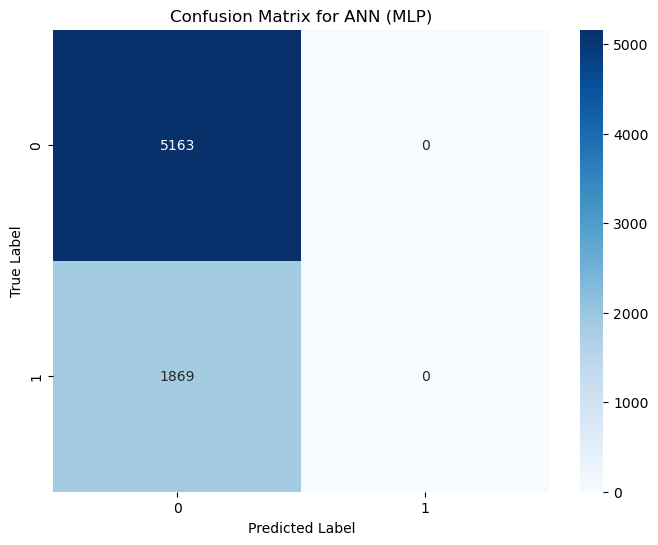

In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Perform cross-validation for each model
results = {}
confusion_matrices = {}

for model_name, model in models.items():
    # Perform cross-validation and calculate accuracy
    accuracy_scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
    
    # Store results as the mean of accuracy scores
    results[model_name] = np.mean(accuracy_scores)
    
    # Fit the model on the entire dataset to generate predictions
    model.fit(X, y)
    y_pred = model.predict(X)
    
    # Generate confusion matrix
    cm = confusion_matrix(y, y_pred)
    # confusion_matrices[model_name] = cm
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


In [39]:
#**Traianing and test data split**
X = df.drop(columns=["Churn"])
y = df["Churn"]

In [40]:
# split training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
print(y_train.shape)

(5625,)


In [42]:
print(y_train.value_counts())

Churn
0    4130
1    1495
Name: count, dtype: int64


In [43]:
#The dataset is imbalanced
#Synthetic Minority Oversampling TEchnique (SMOTE)

In [44]:
smote = SMOTE(random_state=42)

In [45]:
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [46]:
print(y_train_smote.shape)

(8260,)


In [47]:
print(y_train_smote.value_counts())

Churn
1    4130
0    4130
Name: count, dtype: int64


In [48]:
rfc = RandomForestClassifier(n_estimators=50,max_depth=10,min_samples_split=10)

In [49]:
rfc.fit(X_train_smote, y_train_smote)

RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=50)

In [50]:
print(y_test.value_counts())

Churn
0    1033
1     374
Name: count, dtype: int64


In [51]:
# model evaluation
# evaluate on test data
y_test_pred = rfc.predict(X_test)

print("Accuracy Score:\n", accuracy_score(y_test, y_test_pred))
print("Confsuion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

Accuracy Score:
 0.7583511016346838
Confsuion Matrix:
 [[814 219]
 [121 253]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.79      0.83      1033
           1       0.54      0.68      0.60       374

    accuracy                           0.76      1407
   macro avg       0.70      0.73      0.71      1407
weighted avg       0.78      0.76      0.77      1407



In [55]:
# # save the trained model as a pickle file
# model_data = {"model": rfc, "features_names": X.columns.tolist()}


# with open("customer_churn_model.pkl", "wb") as f:
#   pickle.dump(model_data, f)
filename = 'ChurnModel.pkl'
pickle.dump(rfc, open(filename, 'wb'))

In [57]:
# load teh saved model and the feature names

loaded_model = pickle.load(open(filename, 'rb'))

In [59]:
print(loaded_model)

RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=50)


In [ ]:
# print(feature_names)

In [67]:
input_data = {
    'gender': 'Female',
    'SeniorCitizen': 0,
    'Partner': 'Yes',
    'Dependents': 'No',
    'tenure': 11,
    'PhoneService': 'Yes',
    'MultipleLines': 'Yes',
    'InternetService': 'DSL',
    'OnlineSecurity': 'No',
    'OnlineBackup': 'Yes',
    'DeviceProtection': 'No',
    'TechSupport': 'No',
    'StreamingTV': 'No',
    'StreamingMovies': 'No',
    'Contract': 'Month-to-month',
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Electronic check',
    'MonthlyCharges': 10.85,
    'TotalCharges': 11.85
}


input_data_df = pd.DataFrame([input_data])

with open("encoders.pkl", "rb") as f:
  encoders = pickle.load(f)


# encode categorical featires using teh saved encoders
for column, encoder in encoders.items():
  input_data_df[column] = encoder.transform(input_data_df[column])

# make a prediction
prediction = loaded_model.predict(input_data_df)
pred_prob = loaded_model.predict_proba(input_data_df)

print(prediction)

# results
print(f"Prediction: {'Churn' if prediction[0] == 1 else 'No Churn'}")
print(f"Prediciton Probability: {pred_prob}")

[0]
Prediction: No Churn
Prediciton Probability: [[0.63450336 0.36549664]]
